In [11]:
'''
Let's see whether split correlates with the general performance:


We can see that while the general trend does show a very moderate increase in the split ratio with the overall rank 
(that is - the lower the runner is ranked, the more positive his or her split is). 
However, the most dominant trend is the growing variance: while the good runners are all concentrated around a split of, 
say, 1.2, the worse runners are all around the place.
'''

#import
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [12]:
df = pd.read_csv('marathon_results_2016.csv')

In [13]:
#change time string to minites
def time_to_min(string):
    if string is not '-':
        time_segments = string.split(':')
        hours = int(time_segments[0])
        mins = int(time_segments[1])
        sec = int(time_segments[2])
        time = hours*60 + mins + np.true_divide(sec,60)
        return time
    else:
        return -1

In [14]:
df['Half_min'] = df['Half'].apply(lambda x: time_to_min(x))
df['Full_min'] = df['Official Time'].apply(lambda x: time_to_min(x))
df['split_ratio'] = (df['Full_min'] - df['Half_min'])/(df['Half_min'])
df_split = df[df.Half_min > 0]

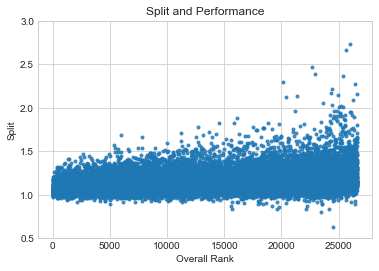

In [15]:
#split and performance
plt.plot(df_split.Overall,df_split.split_ratio,'.', alpha = 0.8)
plt.ylim([0.5,3])
plt.xlabel('Overall Rank')
plt.ylabel('Split')
plt.title('Split and Performance')
plt.savefig("Split and Performance.png")